Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set(rc={'figure.figsize': (14, 14,)})
plt.style.use('seaborn-white')
dataset = load_boston()
df = pd.DataFrame(data=np.c_[dataset.data, dataset.target], columns=list(dataset.feature_names) + ['MEDV'])

### Visualization

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


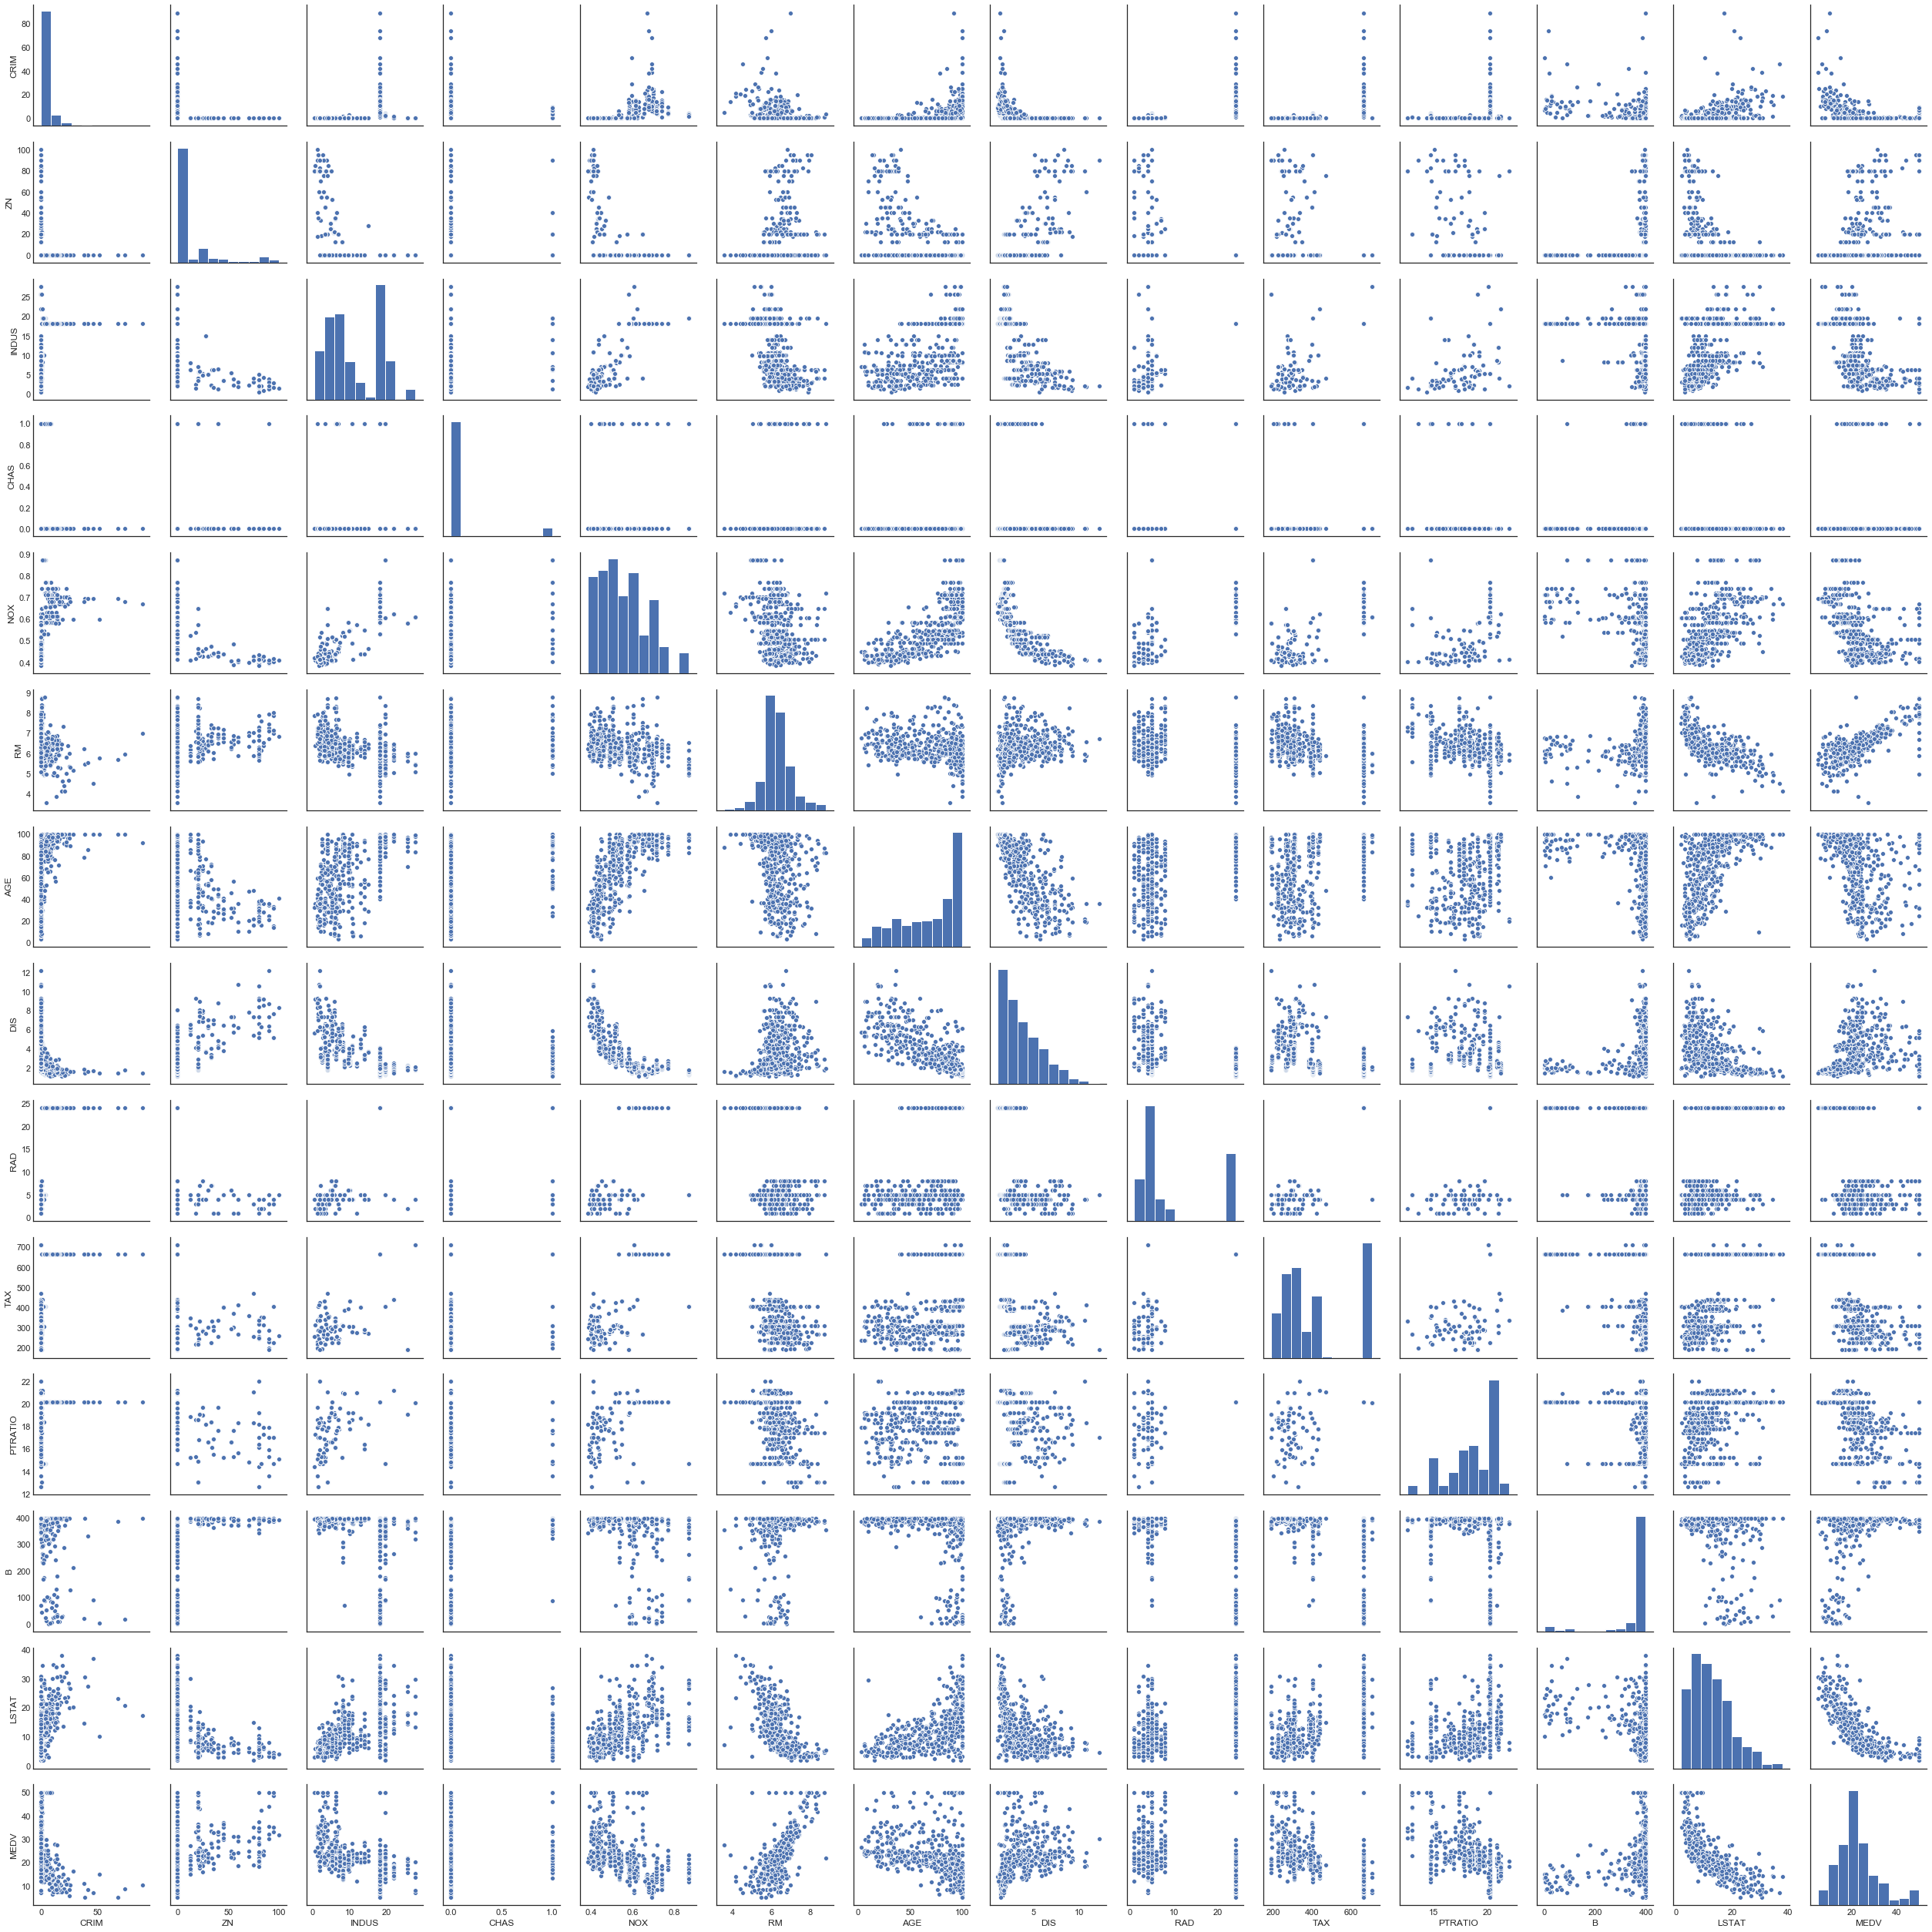

In [3]:
sns.pairplot(df);plt.show()

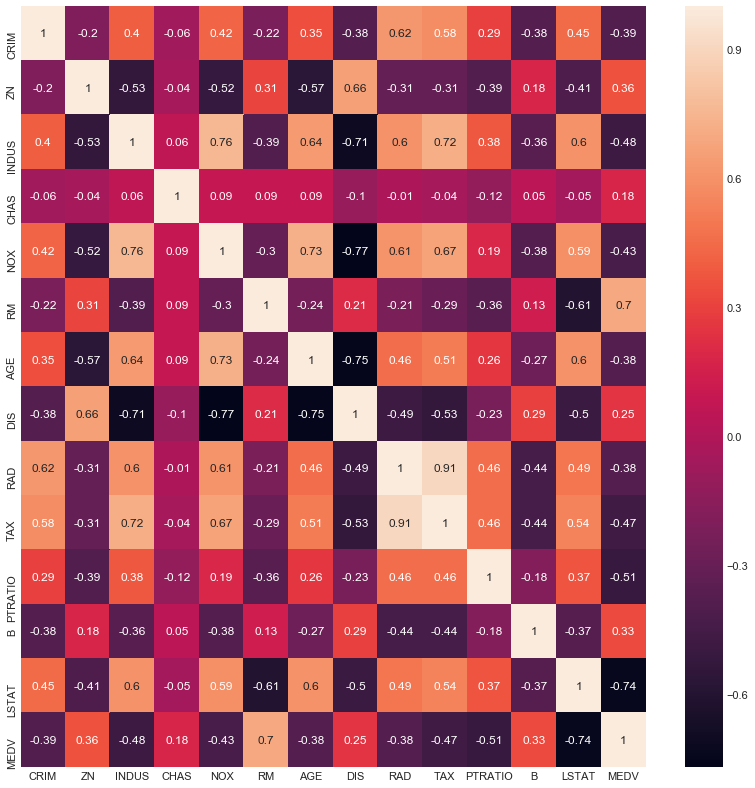

In [20]:
sns.heatmap(df.corr().round(2), annot=True);plt.show()

### Choose the dependent and independent variables

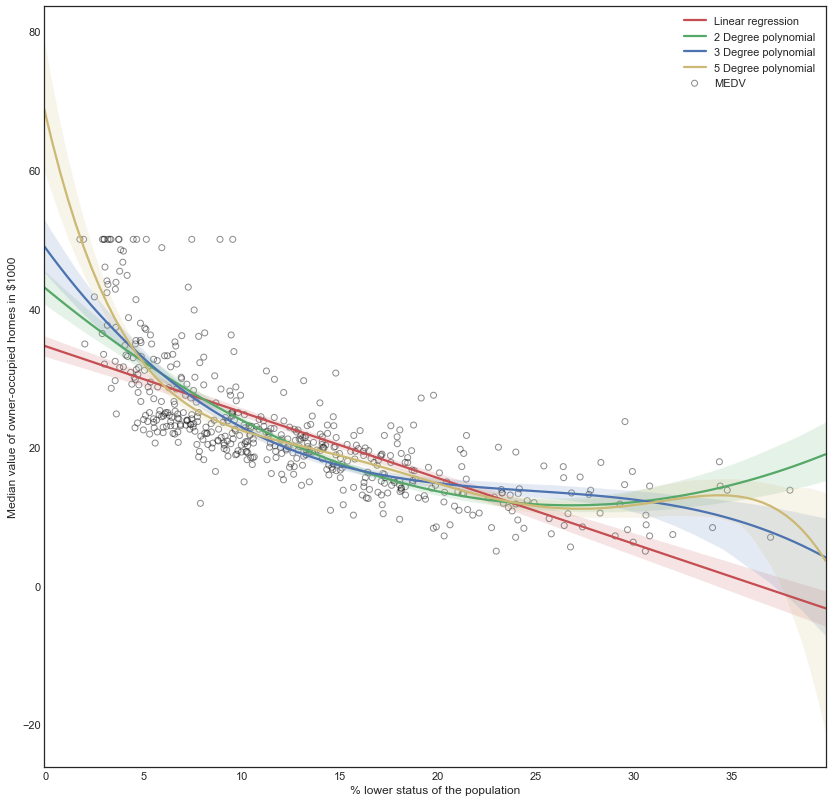

In [51]:
plt.scatter(df['LSTAT'], df['MEDV'], facecolors='None', edgecolors='k', alpha=.5)
sns.regplot(df['LSTAT'], df['MEDV'], label='Linear regression', scatter=False, color='r')
sns.regplot(df['LSTAT'], df['MEDV'], label='2 Degree polynomial', scatter=False, order=2, color='g')
sns.regplot(df['LSTAT'], df['MEDV'], label='3 Degree polynomial', scatter=False, order=3, color='b')
sns.regplot(df['LSTAT'], df['MEDV'], label='5 Degree polynomial', scatter=False, order=5, color='y')
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.legend();plt.show()

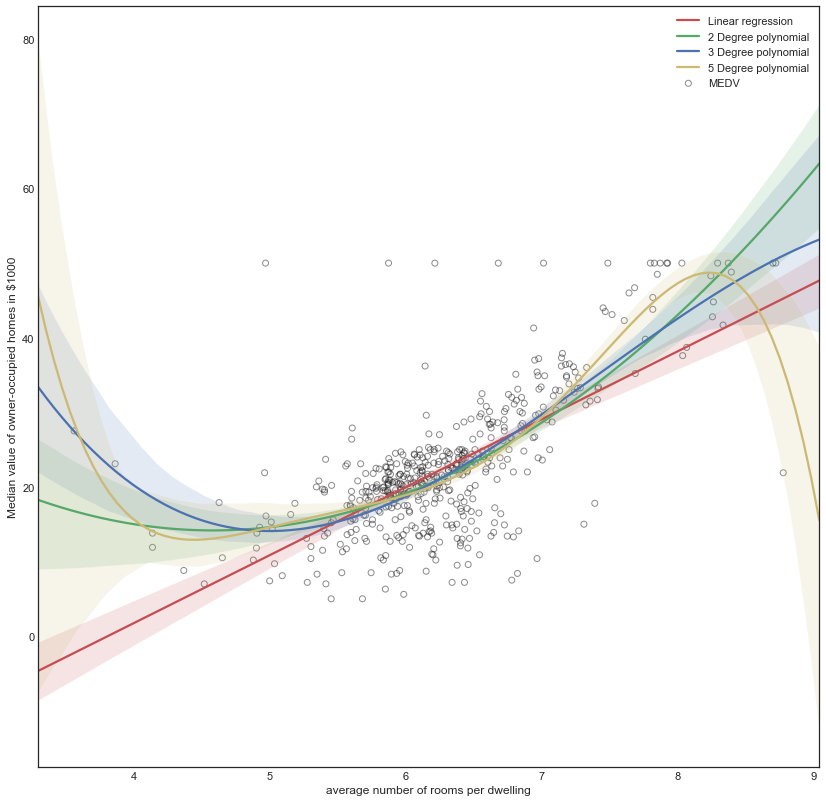

In [50]:
plt.scatter(df['RM'], df['MEDV'], facecolors='None', edgecolors='k', alpha=.5)
sns.regplot(df['RM'], df['MEDV'], label='Linear regression', scatter=False, color='r')
sns.regplot(df['RM'], df['MEDV'], label='2 Degree polynomial', scatter=False, order=2, color='g')
sns.regplot(df['RM'], df['MEDV'], label='3 Degree polynomial', scatter=False, order=3, color='b')
sns.regplot(df['RM'], df['MEDV'], label='5 Degree polynomial', scatter=False, order=5, color='y')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.legend();plt.show()

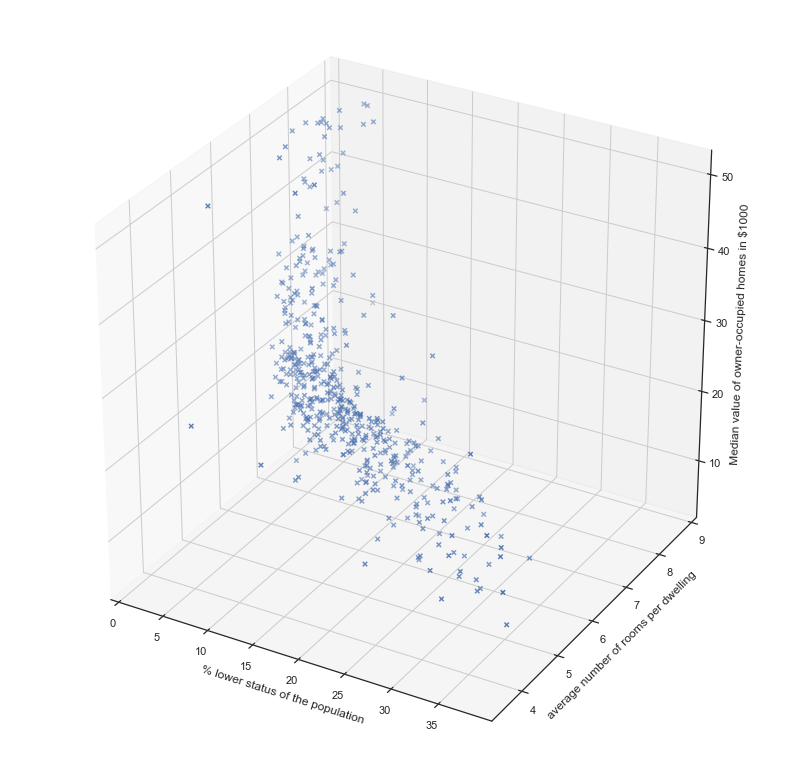

In [23]:
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'], df['RM'], df['MEDV'], marker='x')
ax.set_ylabel('average number of rooms per dwelling')
ax.set_xlabel('% lower status of the population')
ax.set_zlabel('Median value of owner-occupied homes in $1000')
plt.show()

In [8]:
X, y = np.c_[df['LSTAT'].values, df['RM'].values], df['MEDV'].values

### Preprocessing

In [9]:
df.loc[:, ['LSTAT', 'RM', 'MEDV']].head()

,LSTAT,RM,MEDV
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
_y = scaler.fit_transform(y.reshape(-1,1)).reshape(1,-1)[0]
_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=.2)

### Finding the right model

#### Find a measurement

In [11]:
from sklearn.metrics import mean_squared_error as mse

def test_model(model):
    print(model)
    print('Error on test:', mse(y_test, model.predict(X_test)))
    print('Error on train:', mse(y_train, model.predict(X_train)))

#### Try out the models

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
test_model(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
Error on test: 0.011472999286807116
Error on train: 0.016054207012861865


In [13]:
import scipy as sp

poly = sp.polyfit(X_train[:, 0], y_train, 5) # only works with vectors, so I choose the LSTAT feature
polyf = sp.poly1d(poly)

print(polyf)
print()
print( 'Error on test:', mse(y_test, polyf(X_test[:, 0])) )
print( 'Error on train:', mse(y_train, polyf(X_train[:, 0])) )

        5         4         3         2
-18.14 x + 49.61 x - 50.21 x + 23.89 x - 6.02 x + 0.9951

Error on test: 0.009294921599594419
Error on train: 0.014350117941011563


### Results

Linear Regression:
   - Error on test: 0.013963126897039747
   - Error on train: 0.01534837186754506
    
5 degree polynomial:
   - Error on test: 0.011619744747941696
   - Error on train: 0.013738562520749625

In [14]:
# create a grid
lstat = np.arange(_X[:, 0].min(), _X[:, 0].max(), .02)
rm = np.arange(_X[:, 1].min(), _X[:, 1].max(), .02)

B1, B2 = np.meshgrid(lstat, rm, indexing='xy')
Z = np.zeros((lstat.size, rm.size))

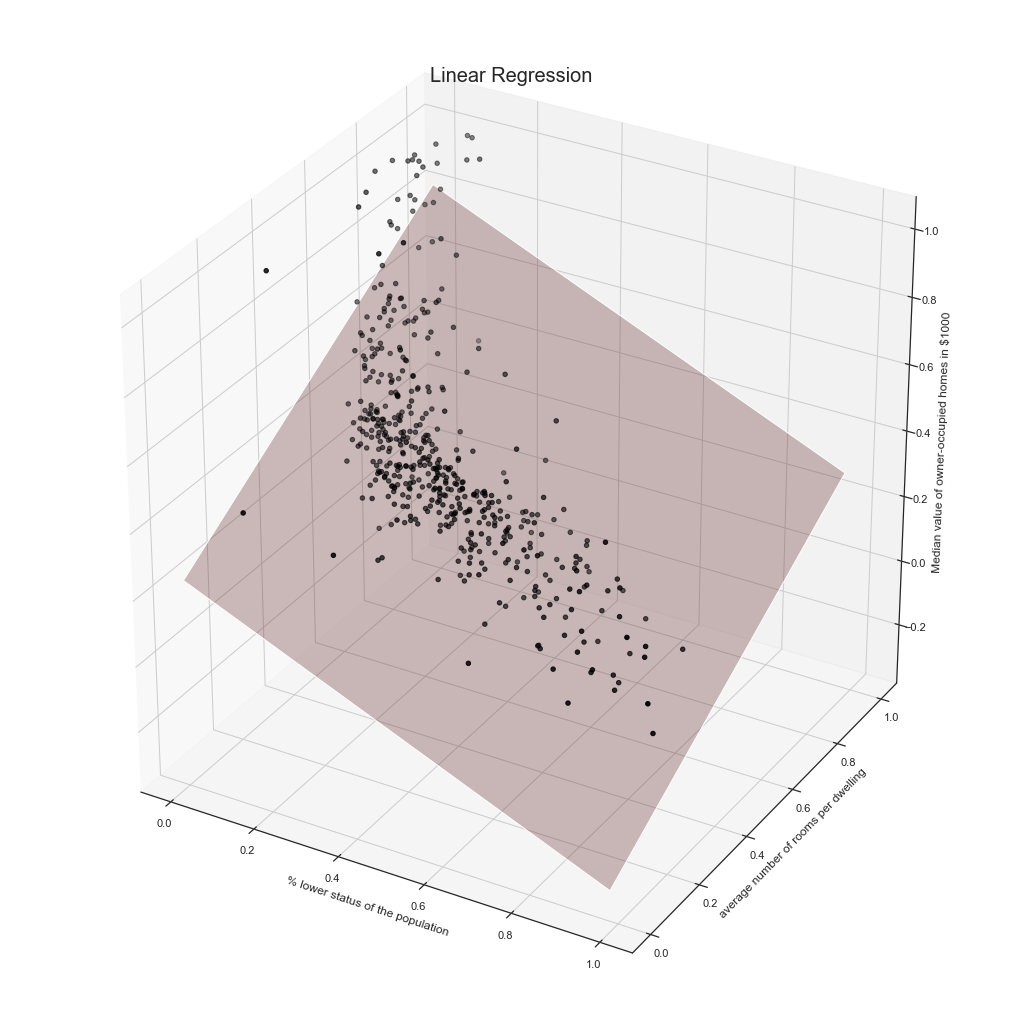

In [24]:
fig = plt.figure()
ax = Axes3D(fig)

for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = lr.intercept_ + B1[i, j]*lr.coef_[0] + B2[i, j]*lr.coef_[1]
    
    
ax.plot_surface(B1, B2, Z, rstride=50, cstride=50, alpha=0.3, color='r')
ax.scatter3D(_X[:, 0], _X[:, 1], _y, color='black')
ax.set_ylabel('average number of rooms per dwelling')
ax.set_xlabel('% lower status of the population')
ax.set_zlabel('Median value of owner-occupied homes in $1000')
ax.set_title('Linear Regression', size=20)
plt.show()

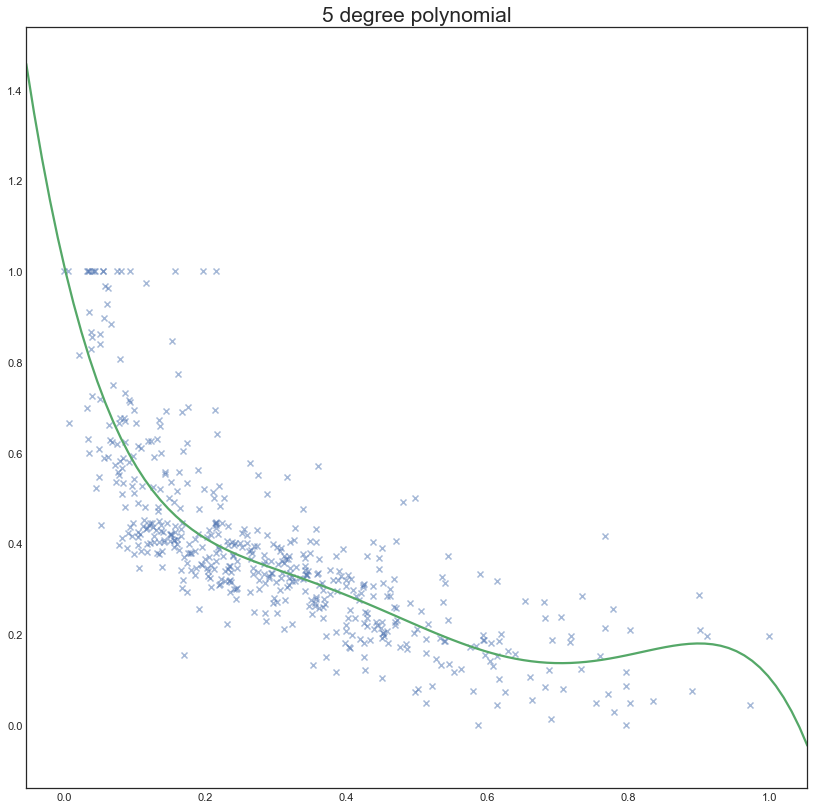

In [54]:
plt.scatter(_X[:, 0], _y, alpha=.5, marker='x')
sns.regplot(_X[:, 0], _y, label='5 Degree polynomial', scatter=False, order=5, color='g', ci=False)
plt.title('5 degree polynomial', size=21)
plt.show()

### Other measurements of the final model

As a final model I choose the 5 degree polynomial.

In [49]:
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score


def mean_absolute_percentage_error(y_true, y_pred):
    return (np.fabs(y_true - y_pred)/y_true)[y_true != 0].mean()


print( 'RMSE on test:', np.sqrt(mse(y_test, polyf(X_test[:, 0]))) )
print( 'RMSE on train:', np.sqrt(mse(y_train, polyf(X_train[:, 0]))) )
print()
print( 'MSE on test:', mse(y_test, polyf(X_test[:, 0])) )
print( 'MSE on train:', mse(y_train, polyf(X_train[:, 0])) )
print()
print( 'MAE on test:', mean_absolute_error(y_test, polyf(X_test[:, 0])) )
print( 'MAE on train:', mean_absolute_error(y_train, polyf(X_train[:, 0])) )
print()
print( 'R2 on test:', r2_score(y_test, polyf(X_test[:, 0])) )
print( 'R2 on train:', r2_score(y_train, polyf(X_train[:, 0])) )
print()
print( 'Explained variance score on test:', explained_variance_score(y_test, polyf(X_test[:, 0])) )
print( 'Explained variance score on train:', explained_variance_score(y_train, polyf(X_train[:, 0])) )
print()
print( 'MAPE on test', mean_absolute_percentage_error(y_test, polyf(X_test[:, 0])) )
print( 'MAPE on train', mean_absolute_percentage_error(y_train, polyf(X_train[:, 0])) )

RMSE on test: 0.09641017373490424
RMSE on train: 0.1197919777823689

MSE on test: 0.009294921599594419
MSE on train: 0.014350117941011563

MAE on test: 0.07423260340314561
MAE on train: 0.08638037110390157

R2 on test: 0.5803842033363472
R2 on train: 0.6917177562119694

Explained variance score on test: 0.5838833367437448
Explained variance score on train: 0.6917177562119694

MAPE on test 0.3462672310398269
MAPE on train 0.27080380837206386


c:\users\kondorm\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
